# Contents
- [0 Cscs](#0)
- [1. Introduction and Data Preprocessing](#1)
    - [1.1 Problem Statement](#1.1)
    - [1.2 Packages](#1.2)
    - [1.3 Read or Import](#1.3)
    - [1.4 Data Summary](#1.4)
    - [1.5 Data Preparation](#1.5)
- [2. Exploratory Data Analysis](#2)
    - [2.1 Dependent/Target Variable](#2.1)
        - [2.1.1 Qualitative/Categorical Variables](#2.1.1)
            - [2.1.1.1 Transported](#2.1.1.1)
    - [2.2 Independent/Predictors Variable](#2.2)
        - [2.2.1 Quantitative/Numerical Variables](#2.2.1)
            - [2.2.1.1 Age](#2.2.1.1)
            - [2.2.1.2 RoomService](#2.2.1.2)
            - [2.2.1.3 FoodCourt](#2.2.1.3)
            - [2.2.1.4 ShoppingMall](#2.2.1.4)
            - [2.2.1.5 Spa](#2.2.1.5)
            - [2.2.1.6 VRDeck](#2.2.1.6)
            - [2.2.2.7 Notes Recap](#2.2.2.7)
        - [2.2.2 Qualitative/Categorical Variables](#2.2.2)
            - [2.2.2.1 PassengerId](#2.2.2.1)
            - [2.2.2.2 HomePlanet](#2.2.2.2)
            - [2.2.2.3 CryoSleep](#2.2.2.3)
            - [2.2.2.4 Cabin](#2.2.2.4)
            - [2.2.2.5 Destination](#2.2.2.5)
            - [2.2.2.6 VIP](#2.2.2.6)
            - [2.2.2.7 Name](#2.2.2.7)
            - [2.2.2.8 Notes Recap](#2.2.2.8)
- [3. Feature Engineering](#3)
    - [3.1 Missing Values](#3.1)
        - [3.1.1 Detect](#3.1.1)
        - [3.1.2 Observe](#3.1.2)
        - [3.1.3 Action](#3.1.3)
    - [3.2 Standardization](#3.2)
    - [3.3 Adding new variables](#3.3)
        - [3.3.1 Training Set](#3.3.1)
            - [3.3.1.1 EDA on new variables](#3.3.1.1)
        - [3.3.2 Test Set](#3.3.2)
    - [3.4 Convert Qualitative/Categorical Variables to Quantitative/Numerical Variables](#3.4)
        - [3.4.1 Training Set](#3.5.1)
        - [3.4.2 Test Set](#3.5.1)
    - [3.5 Filter with relevant variables](#3.5)
        - [3.5.1 Training Set](#3.5.1)
        - [3.5.2 Test Set](#3.5.1)
- [4. Model](#4)
    - [4.1 Split Data](#4.1)
    - [4.2 Algorithm (Multivariable, Binomial)](#4.2)
        - [4.2.1 Logistic Regression](#4.2.1)
        - [4.2.2 Decision Trees](#4.2.2)
        - [4.2.3 Random Forest)](#4.2.3)
- [5. Conclusion](#5)

<a name='0'></a>
# 0 Case Description

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

Practice Skills

<a name='0.1'></a>
## 0.1 Objectives

    - Creative feature engineering 
    - Advanced regression techniques like random forest and gradient boosting

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

<a name='1.2'></a>
## 1.2 Load Packages

In [2]:
"""
Title: house-prices-advanced-regression-techniques
Author: Rifqi Azhari
Date: 2/27/2024
"""

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.4.2
matplotlib version: 3.5.1
NumPy version: 1.21.5
SciPy version: 1.7.3
IPython version: 8.2.0
scikit-learn version: 1.0.2
-------------------------


In [3]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

ModuleNotFoundError: No module named 'xgboost'

In [4]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

<a name='1.3'></a>
## 1.3 Read or Import

In [5]:
data_raw = pd.read_csv("train.csv")
data_val = pd.read_csv("test.csv")

<a name='1.4'></a>
## 1.4 Data Summary

Here's a brief version of what you'll find in the data description file.

        SalePrice:     The property's sale price in dollars. This is the target variable that you're trying to predict.
        
        MSSubClass:    The building class
        MSZoning:      The general zoning classification
        LotFrontage:   Linear feet of street connected to property
        LotArea:       Lot size in square feet
        Street:        Type of road access
        Alley:         Type of alley access
        LotShape:      General shape of property
        LandContour:   Flatness of the property
        Utilities:     Type of utilities available
        LotConfig:     Lot configuration
        LandSlope:     Slope of property
        Neighborhood:  Physical locations within Ames city limits
        Condition1:    Proximity to main road or railroad
        Condition2:    Proximity to main road or railroad (if a second is present)
        BldgType:      Type of dwelling
        HouseStyle:    Style of dwelling
        OverallQual:   Overall material and finish quality
        OverallCond:   Overall condition rating
        YearBuilt:     Original construction date
        YearRemodAdd:  Remodel date
        RoofStyle:     Type of roof
        RoofMatl:      Roof material
        Exterior1st:   Exterior covering on house
        Exterior2nd:   Exterior covering on house (if more than one material)
        MasVnrType:    Masonry veneer type
        MasVnrArea:    Masonry veneer area in square feet
        ExterQual:     Exterior material quality
        ExterCond:     Present condition of the material on the exterior
        Foundation:    Type of foundation
        BsmtQual:      Height of the basement
        BsmtCond:      General condition of the basement
        BsmtExposure:  Walkout or garden level basement walls
        BsmtFinType1:  Quality of basement finished area
        BsmtFinSF1:    Type 1 finished square feet
        BsmtFinType2:  Quality of second finished area (if present)
        BsmtFinSF2:    Type 2 finished square feet
        BsmtUnfSF:     Unfinished square feet of basement area
        TotalBsmtSF:   Total square feet of basement area
        Heating:       Type of heating
        HeatingQC:     Heating quality and condition
        CentralAir:    Central air conditioning
        Electrical:    Electrical system
        1stFlrSF:      First Floor square feet
        2ndFlrSF:      Second floor square feet
        LowQualFinSF:  Low quality finished square feet (all floors)
        GrLivArea:     Above grade (ground) living area square feet
        BsmtFullBath:  Basement full bathrooms
        BsmtHalfBath:  Basement half bathrooms
        FullBath:      Full bathrooms above grade
        HalfBath:      Half baths above grade
        Bedroom:       Number of bedrooms above basement level
        Kitchen:       Number of kitchens
        KitchenQual:   Kitchen quality
        TotRmsAbvGrd:  Total rooms above grade (does not include bathrooms)
        Functional:    Home functionality rating
        Fireplaces:    Number of fireplaces
        FireplaceQu:   Fireplace quality
        GarageType:    Garage location
        GarageYrBlt:   Year garage was built
        GarageFinish:  Interior finish of the garage
        GarageCars:    Size of garage in car capacity
        GarageArea:    Size of garage in square feet
        GarageQual:    Garage quality
        GarageCond:    Garage condition
        PavedDrive:    Paved driveway
        WoodDeckSF:    Wood deck area in square feet
        OpenPorchSF:   Open porch area in square feet
        EnclosedPorch: Enclosed porch area in square feet
        3SsnPorch:     Three season porch area in square feet
        ScreenPorch:   Screen porch area in square feet
        PoolArea:      Pool area in square feet
        PoolQC:        Pool quality
        Fence:         Fence quality
        MiscFeature:   Miscellaneous feature not covered in other categories
        MiscVal:       Value of miscellaneous feature
        MoSold:        Month Sold
        YrSold:        Year Sold
        SaleType:      Type of sale
        SaleCondition: Condition of sale

In [6]:
data1 = data_raw.copy(deep = True)

In [7]:
# For doing feature engineering of training and test data at the same time

data_cleaner = [data1, data_val]

In [8]:
numCols = list(data1.select_dtypes(exclude='object').columns)
print(f"There are {len(numCols)} numerical features:\n", numCols)

#There are 38 numerical features

There are 38 numerical features:
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [9]:
catCols = list(data1.select_dtypes(include='object').columns)
print(f"There are {len(catCols)} categorical features:\n", catCols)

#There are 43 categorical features

There are 43 categorical features:
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


<a name='2'></a>
# 2 Expolatory Data Analysis (EDA)

## 2.1 Early filter of missing data

In [10]:
missing_data_train_count = data1.isnull().sum()
missing_data_train_percent = data1.isnull().sum() / len(data1) * 100

missing_data_train = pd.DataFrame({
    'data1 Count': missing_data_train_count,
    'data1 Percent': missing_data_train_percent
})
missing_data_train = missing_data_train[missing_data_train['data1 Count'] > 0]
missing_data_train.sort_values(by='data1 Count', ascending=False, inplace=True)

print(f"There are {missing_data_train.shape[0]} features having missing data in training set.")

###
missing_data_val_count = data_val.isnull().sum()
missing_data_val_percent = data_val.isnull().sum() / len(data_val) * 100

missing_data_val = pd.DataFrame({
    'data_val Count': missing_data_val_count,
    'data_val Percent': missing_data_val_percent
})
missing_data_val = missing_data_val[missing_data_val['data_val Count'] > 0]
missing_data_val.sort_values(by='data_val Count', ascending=False, inplace=True)

print(f"There are {missing_data_val.shape[0]} features having missing data in test set.")

result = pd.concat([missing_data_train, missing_data_val], axis=1)
result

There are 19 features having missing data in training set.
There are 33 features having missing data in test set.


,data1 Count,data1 Percent,data_val Count,data_val Percent
PoolQC,1453.0,99.520548,1456.0,99.794380
MiscFeature,1406.0,96.301370,1408.0,96.504455
Alley,1369.0,93.767123,1352.0,92.666210
Fence,1179.0,80.753425,1169.0,80.123372
FireplaceQu,690.0,47.260274,730.0,50.034270
LotFrontage,259.0,17.739726,227.0,15.558602
GarageType,81.0,5.547945,76.0,5.209047
GarageYrBlt,81.0,5.547945,78.0,5.346127
GarageFinish,81.0,5.547945,78.0,5.346127
GarageQual,81.0,5.547945,78.0,5.346127


There are 6 variables who has missing values more than 10% of its proportion.

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage']

    PoolQC:        Pool quality
    MiscFeature:   Miscellaneous feature not covered in other categories
    Alley:         Type of alley access
    Fence:         Fence quality
    FireplaceQu:   Fireplace quality
    LotFrontage:   Linear feet of street connected to property

I will drop these variables

In [11]:
for dataset in data_cleaner: 
    dataset.drop('PoolQC', axis=1, inplace=True)
    dataset.drop('MiscFeature', axis=1, inplace=True)
    dataset.drop('Alley', axis=1, inplace=True)
    dataset.drop('Fence', axis=1, inplace=True)
    dataset.drop('FireplaceQu', axis=1, inplace=True)
    dataset.drop('LotFrontage', axis=1, inplace=True)

## 2.2 Take a peek of the data

From definition, sample, dispersion, we will decide the exact type of each variable

In [12]:
len(data1)

1460

In [13]:
#CHECK CONTINUOUS OR DISCRETE HERE (FROM THE VALUE SAMPLE)
#CHECK ORDINAL OR NOMINAL HERE (FROM THE VALUE SAMPLE)
data1['SaleCondition'].head(5)

0     Normal
1     Normal
2     Normal
3    Abnorml
4     Normal
Name: SaleCondition, dtype: object

In [14]:
#CHECK CONTINUOUS OR DISCRETE HERE (FROM THE VALUE DISPERSION)
#CHECK ORDINAL OR NOMINAL HERE (FROM THE VALUE DISPERSION)
data_val['Utilities'].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

From 37 detected numerical features:
typical: number of bedroom=discrete, area of=continuous

    - Continuous  ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF'
                   '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                   '3SsnPorch', 'ScreenPorch', 'PoolArea']
    - Discrete    ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd'
                   'Fireplaces', 'GarageCars', 'MiscVal']
    - Ordinal     ['MSSubClass', 'OverallQual', 'OverallCond']
    - Nominal     [
    - Other       ['Id', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

From 38 detected categorical features:

    - Ordinal     []
    - Nominal     ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
                   'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
                   'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
                   'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
                   'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
    - Binary      ['Street', 'Utilities', 'CentralAir']
    - Other       []

## NUMERICAL

There is so many data value = 0 in those variables, i will try to compare the variables graph with and without 0 value. FILTER ==! 0

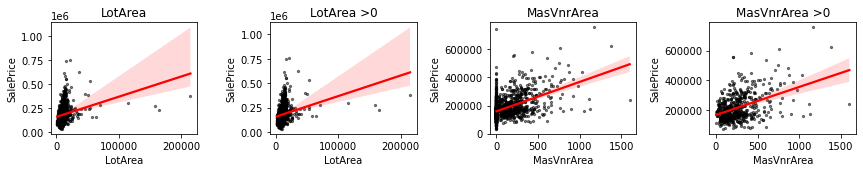

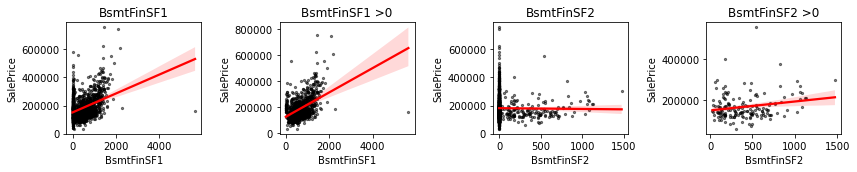

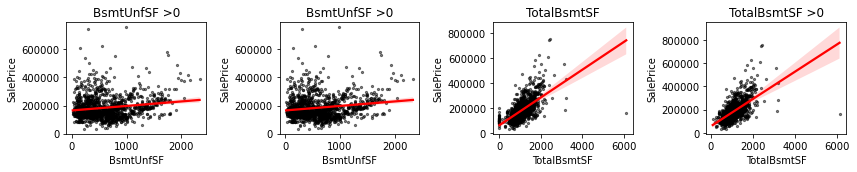

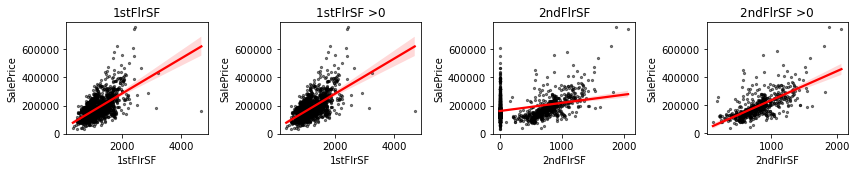

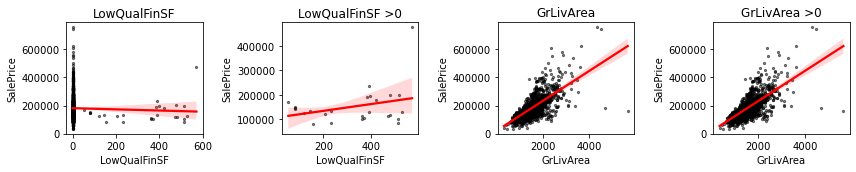

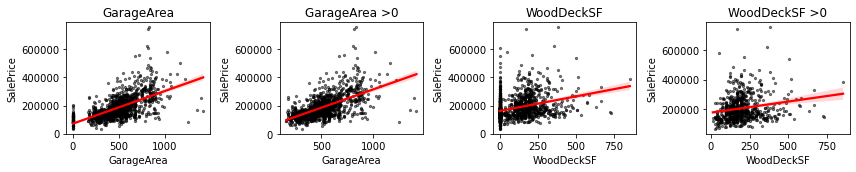

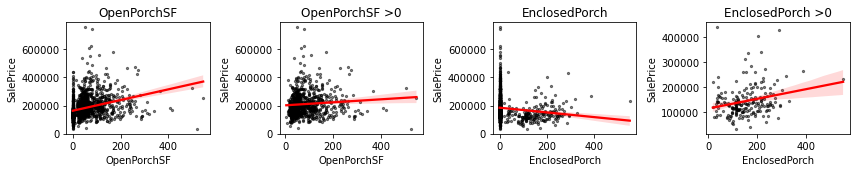

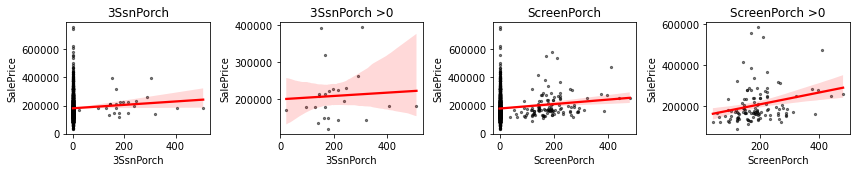

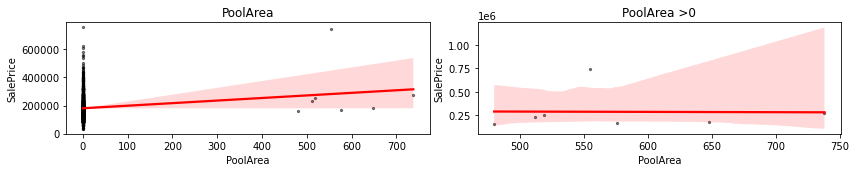

In [15]:
#1ST ROW
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,4,1)
sns.regplot(data=data1, x='LotArea', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("LotArea")

plt.subplot(1,4,2)
sns.regplot(data=data1.loc[data1['LotArea']>0], x='LotArea', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("LotArea >0")

plt.subplot(1,4,3)
sns.regplot(data=data1, x='MasVnrArea', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("MasVnrArea")

plt.subplot(1,4,4)
sns.regplot(data=data1.loc[data1['MasVnrArea']>0], x='MasVnrArea', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("MasVnrArea >0")
fig.tight_layout()

#2ND ROW
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,4,1)
sns.regplot(data=data1, x='BsmtFinSF1', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("BsmtFinSF1")

plt.subplot(1,4,2)
sns.regplot(data=data1.loc[data1['BsmtFinSF1']>0], x='BsmtFinSF1', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("BsmtFinSF1 >0")

plt.subplot(1,4,3)
sns.regplot(data=data1, x='BsmtFinSF2', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("BsmtFinSF2")

plt.subplot(1,4,4)
sns.regplot(data=data1.loc[data1['BsmtFinSF2']>0], x='BsmtFinSF2', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("BsmtFinSF2 >0")
fig.tight_layout()

#3RD ROW
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,4,1)
sns.regplot(data=data1.loc[data1['BsmtUnfSF']>0], x='BsmtUnfSF', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("BsmtUnfSF >0")

plt.subplot(1,4,2)
sns.regplot(data=data1.loc[data1['BsmtUnfSF']>0], x='BsmtUnfSF', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("BsmtUnfSF >0")

plt.subplot(1,4,3)
sns.regplot(data=data1, x='TotalBsmtSF', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("TotalBsmtSF")

plt.subplot(1,4,4)
sns.regplot(data=data1.loc[data1['TotalBsmtSF']>0], x='TotalBsmtSF', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("TotalBsmtSF >0")
fig.tight_layout()

#4TH ROW
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,4,1)
sns.regplot(data=data1, x='1stFlrSF', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("1stFlrSF")

plt.subplot(1,4,2)
sns.regplot(data=data1.loc[data1['1stFlrSF']>0], x='1stFlrSF', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("1stFlrSF >0")

plt.subplot(1,4,3)
sns.regplot(data=data1, x='2ndFlrSF', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("2ndFlrSF")

plt.subplot(1,4,4)
sns.regplot(data=data1.loc[data1['2ndFlrSF']>0], x='2ndFlrSF', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("2ndFlrSF >0")
fig.tight_layout()

#5RD ROW
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,4,1)
sns.regplot(data=data1, x='LowQualFinSF', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("LowQualFinSF")

plt.subplot(1,4,2)
sns.regplot(data=data1.loc[data1['LowQualFinSF']>0], x='LowQualFinSF', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("LowQualFinSF >0")

plt.subplot(1,4,3)
sns.regplot(data=data1, x='GrLivArea', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("GrLivArea")

plt.subplot(1,4,4)
sns.regplot(data=data1.loc[data1['GrLivArea']>0], x='GrLivArea', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("GrLivArea >0")
fig.tight_layout()

#6TH ROW
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,4,1)
sns.regplot(data=data1, x='GarageArea', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("GarageArea")

plt.subplot(1,4,2)
sns.regplot(data=data1.loc[data1['GarageArea']>0], x='GarageArea', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("GarageArea >0")

plt.subplot(1,4,3)
sns.regplot(data=data1, x='WoodDeckSF', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("WoodDeckSF")

plt.subplot(1,4,4)
sns.regplot(data=data1.loc[data1['WoodDeckSF']>0], x='WoodDeckSF', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("WoodDeckSF >0")
fig.tight_layout()

#7TH ROW
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,4,1)
sns.regplot(data=data1, x='OpenPorchSF', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("OpenPorchSF")

plt.subplot(1,4,2)
sns.regplot(data=data1.loc[data1['OpenPorchSF']>0], x='OpenPorchSF', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("OpenPorchSF >0")

plt.subplot(1,4,3)
sns.regplot(data=data1, x='EnclosedPorch', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("EnclosedPorch")

plt.subplot(1,4,4)
sns.regplot(data=data1.loc[data1['EnclosedPorch']>0], x='EnclosedPorch', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("EnclosedPorch >0")
fig.tight_layout()

#8TH ROW
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,4,1)
sns.regplot(data=data1, x='3SsnPorch', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("3SsnPorch")

plt.subplot(1,4,2)
sns.regplot(data=data1.loc[data1['3SsnPorch']>0], x='3SsnPorch', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("3SsnPorch >0")

plt.subplot(1,4,3)
sns.regplot(data=data1, x='ScreenPorch', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("ScreenPorch")

plt.subplot(1,4,4)
sns.regplot(data=data1.loc[data1['ScreenPorch']>0], x='ScreenPorch', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("ScreenPorch >0")
fig.tight_layout()

#8TH ROW
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,2,1)
sns.regplot(data=data1, x='PoolArea', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("PoolArea")

plt.subplot(1,2,2)
sns.regplot(data=data1.loc[data1['PoolArea']>0], x='PoolArea', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("PoolArea >0")
fig.tight_layout()

As we can see the difference between the whole value and the aggregated without 0 value from the graph:
        
    - Relatively the same:
        ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF',
        '1stFlrSF', 'GrLivArea', 'GarageArea', '3SsnPorch']
    - Slightly different:
         ['BsmtFinSF1', 'ScreenPorch', 'WoodDeckSF']
    - Very different:
        ['2ndFlrSF', 'OpenPorchSF']
    - Extremely different:
        ['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch'] from negative to positive
        ['PoolArea'] from positive to negative

The action we are gonna do is this:

    Keep the original feature in 'Relatively the same' variables
    Add a new binary feature and keep the original feature in 'Slightly different' variables
    Add a new binary feature and delete the original feature in 'Very and Extremely different' variables

In [16]:
#CONVERT THIS NOMINAL VARIABLE TO BINARY VARIABLE THEN CONVERT TO NUMERICAL VALUE WITH ONE-HOT ENCODER
for dataset in data_cleaner:
    # New features - training set
    #SLIGHTLY DIFFERENT
    dataset['BsmtFinSF1_no']=(dataset['BsmtFinSF1']==0).astype(int)
    dataset['BsmtFinSF1_yes']=(dataset['BsmtFinSF1']>0).astype(int)
    dataset['ScreenPorch_no']=(dataset['ScreenPorch']==0).astype(int)
    dataset['ScreenPorch_yes']=(dataset['ScreenPorch']>0).astype(int)
    dataset['WoodDeckSF_no']=(dataset['WoodDeckSF']==0).astype(int)
    dataset['WoodDeckSF_yes']=(dataset['WoodDeckSF']>0).astype(int)
    
    #VERY DIFFERENT
    dataset['2ndFlrSF_no']=(dataset['2ndFlrSF']==0).astype(int)
    dataset['2ndFlrSF_yes']=(dataset['2ndFlrSF']>0).astype(int)
    dataset['OpenPorchSF_no']=(dataset['OpenPorchSF']==0).astype(int)
    dataset['OpenPorchSF_yes']=(dataset['OpenPorchSF']>0).astype(int)
    dataset.drop('2ndFlrSF', axis=1, inplace=True)
    dataset.drop('OpenPorchSF', axis=1, inplace=True)
    
    #EXTREMELY DIFFERENT
    dataset['BsmtFinSF2_no']=(dataset['BsmtFinSF2']==0).astype(int)
    dataset['BsmtFinSF2_yes']=(dataset['BsmtFinSF2']>0).astype(int)
    dataset['LowQualFinSF_no']=(dataset['LowQualFinSF']==0).astype(int)
    dataset['LowQualFinSF_yes']=(dataset['LowQualFinSF']>0).astype(int)
    dataset['EnclosedPorch_no']=(dataset['EnclosedPorch']==0).astype(int)
    dataset['EnclosedPorch_yes']=(dataset['EnclosedPorch']>0).astype(int)
    dataset['PoolArea_no']=(dataset['PoolArea']==0).astype(int)
    dataset['PoolArea_yes']=(dataset['PoolArea']>0).astype(int)
    dataset.drop('BsmtFinSF2', axis=1, inplace=True)
    dataset.drop('LowQualFinSF', axis=1, inplace=True)
    dataset.drop('EnclosedPorch', axis=1, inplace=True)
    dataset.drop('PoolArea', axis=1, inplace=True)

ADD: 18

    ['BsmtFinSF1_no', 'BsmtFinSF1_yes', 'ScreenPorch_no', 'ScreenPorch_yes', 'WoodDeckSF_no', 'WoodDeckSF_yes', '2ndFlrSF_no', '2ndFlrSF_yes', 'OpenPorchSF_no', 'OpenPorchSF_yes', 'BsmtFinSF2_no', 'BsmtFinSF2_yes', 'LowQualFinSF_no', 'LowQualFinSF_yes', 'EnclosedPorch_no', 'EnclosedPorch_yes', 'PoolArea_no', 'PoolArea_yes']

DELETE: 6

    ['2ndFlrSF', 'OpenPorchSF', 'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', 'PoolArea']

## FILL THE REST OF MISSING VALUE

In [17]:
missing_data_train_count = data1.isnull().sum()
missing_data_train_percent = data1.isnull().sum() / len(data1) * 100

missing_data_train = pd.DataFrame({
    'data1 Count': missing_data_train_count,
    'data1 Percent': missing_data_train_percent
})
missing_data_train = missing_data_train[missing_data_train['data1 Count'] > 0]
missing_data_train.sort_values(by='data1 Count', ascending=False, inplace=True)

print(f"There are {missing_data_train.shape[0]} features having missing data in training set.")

###
missing_data_val_count = data_val.isnull().sum()
missing_data_val_percent = data_val.isnull().sum() / len(data_val) * 100

missing_data_val = pd.DataFrame({
    'data_val Count': missing_data_val_count,
    'data_val Percent': missing_data_val_percent
})
missing_data_val = missing_data_val[missing_data_val['data_val Count'] > 0]
missing_data_val.sort_values(by='data_val Count', ascending=False, inplace=True)

print(f"There are {missing_data_val.shape[0]} features having missing data in test set.")

result = pd.concat([missing_data_train, missing_data_val], axis=1)
result

There are 13 features having missing data in training set.
There are 26 features having missing data in test set.


,data1 Count,data1 Percent,data_val Count,data_val Percent
GarageType,81.0,5.547945,76.0,5.209047
GarageYrBlt,81.0,5.547945,78.0,5.346127
GarageFinish,81.0,5.547945,78.0,5.346127
GarageQual,81.0,5.547945,78.0,5.346127
GarageCond,81.0,5.547945,78.0,5.346127
BsmtExposure,38.0,2.602740,44.0,3.015764
BsmtFinType2,38.0,2.602740,42.0,2.878684
BsmtQual,37.0,2.534247,44.0,3.015764
BsmtCond,37.0,2.534247,45.0,3.084304
BsmtFinType1,37.0,2.534247,42.0,2.878684


In [18]:
for dataset in data_cleaner:
    dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(dataset['MasVnrArea'].mean())
    dataset['BsmtFullBath'] = dataset['BsmtFullBath'].fillna(dataset['BsmtFullBath'].mean())
    dataset['BsmtHalfBath'] = dataset['BsmtHalfBath'].fillna(dataset['BsmtHalfBath'].mean())
    dataset['BsmtFinSF1'] = dataset['BsmtFinSF1'].fillna(dataset['BsmtFinSF1'].mean())
    dataset['BsmtUnfSF'] = dataset['BsmtUnfSF'].fillna(dataset['BsmtUnfSF'].mean())
    dataset['TotalBsmtSF'] = dataset['TotalBsmtSF'].fillna(dataset['TotalBsmtSF'].mean())
    dataset['GarageCars'] = dataset['GarageCars'].fillna(dataset['GarageCars'].mean())
    dataset['GarageArea'] = dataset['GarageArea'].fillna(dataset['GarageArea'].mean())

In [19]:
missing_data_train_count = data1.isnull().sum()
missing_data_train_percent = data1.isnull().sum() / len(data1) * 100

missing_data_train = pd.DataFrame({
    'data1 Count': missing_data_train_count,
    'data1 Percent': missing_data_train_percent
})
missing_data_train = missing_data_train[missing_data_train['data1 Count'] > 0]
missing_data_train.sort_values(by='data1 Count', ascending=False, inplace=True)

print(f"There are {missing_data_train.shape[0]} features having missing data in training set.")

###
missing_data_val_count = data_val.isnull().sum()
missing_data_val_percent = data_val.isnull().sum() / len(data_val) * 100

missing_data_val = pd.DataFrame({
    'data_val Count': missing_data_val_count,
    'data_val Percent': missing_data_val_percent
})
missing_data_val = missing_data_val[missing_data_val['data_val Count'] > 0]
missing_data_val.sort_values(by='data_val Count', ascending=False, inplace=True)

print(f"There are {missing_data_val.shape[0]} features having missing data in test set.")

result = pd.concat([missing_data_train, missing_data_val], axis=1)
result

There are 12 features having missing data in training set.
There are 18 features having missing data in test set.


,data1 Count,data1 Percent,data_val Count,data_val Percent
GarageType,81.0,5.547945,76.0,5.209047
GarageYrBlt,81.0,5.547945,78.0,5.346127
GarageFinish,81.0,5.547945,78.0,5.346127
GarageQual,81.0,5.547945,78.0,5.346127
GarageCond,81.0,5.547945,78.0,5.346127
BsmtExposure,38.0,2.602740,44.0,3.015764
BsmtFinType2,38.0,2.602740,42.0,2.878684
BsmtQual,37.0,2.534247,44.0,3.015764
BsmtCond,37.0,2.534247,45.0,3.084304
BsmtFinType1,37.0,2.534247,42.0,2.878684


## 2 CATEGORICAL VARIABLE

In [ ]:
#1ST ROW ['MSZoning', 'LotShape', 'LandContour', 'LotConfig]
#2ND ROW ['LandSlope', 'Condition1', 'Condition2', 'BldgType']
#3RD ROW ['HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType']
#4TH ROW ['ExterQual', 'ExterCond', 'Foundation', 'BsmtQual']
#5TH ROW ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
#6TH ROW ['Heating', 'HeatingQC', 'Electrical', 'KitchenQual']
#7TH ROW ['Functional', 'GarageType', 'GarageFinish', 'GarageQual']
#8TH ROW ['GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
#9TH ROW ['Street', 'Utilities', 'CentralAir']

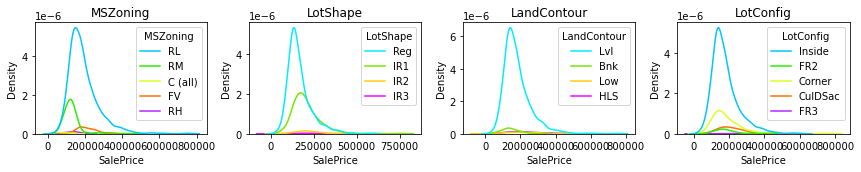

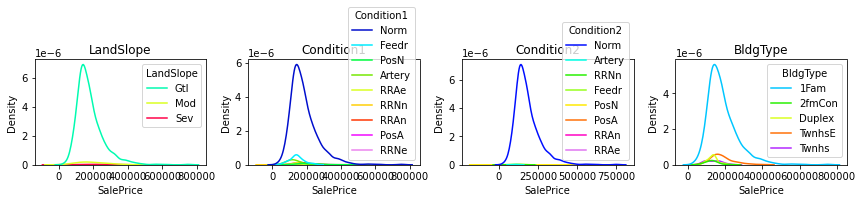

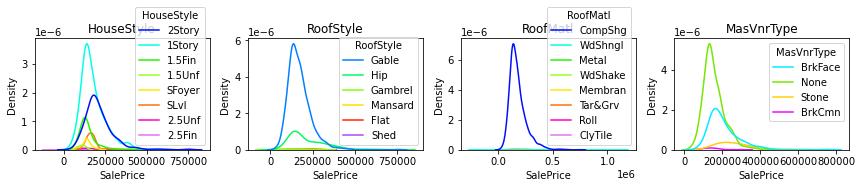

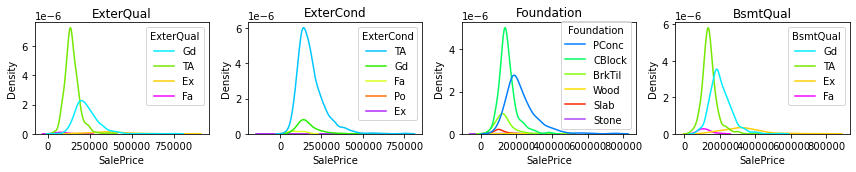

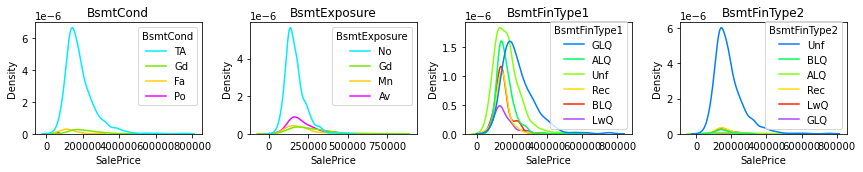

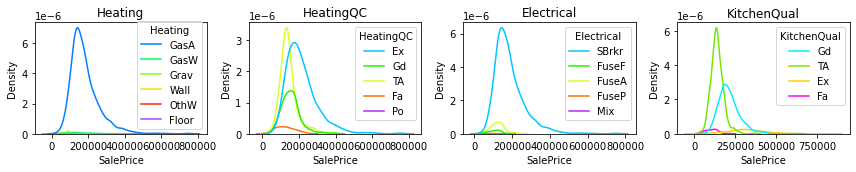

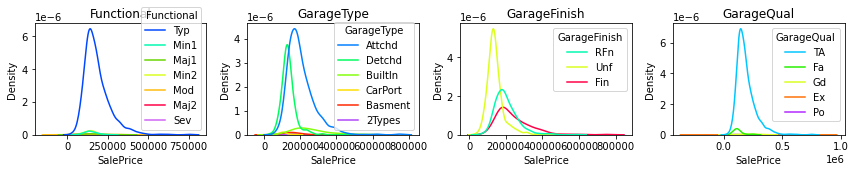

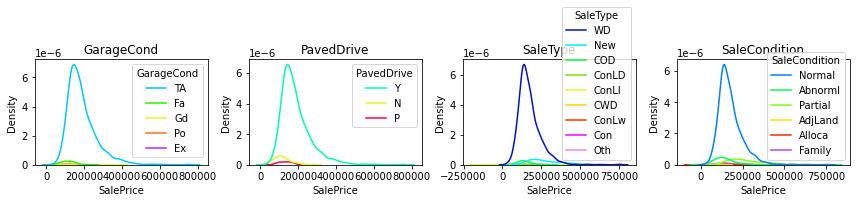

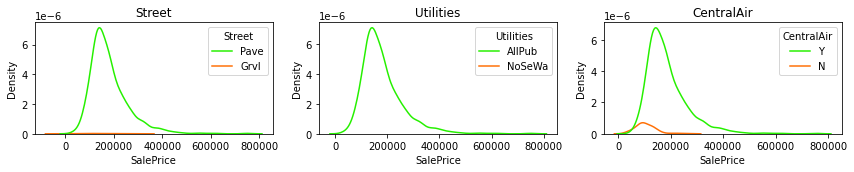

In [20]:
#1ST ROW ['MSZoning', 'LotShape', 'LandContour', 'LotConfig]
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,4,1)
sns.kdeplot(data=data1, x='SalePrice', hue='MSZoning', palette='gist_ncar')
title = plt.title("MSZoning")

plt.subplot(1,4,2)
sns.kdeplot(data=data1, x='SalePrice', hue='LotShape', palette='gist_ncar')
title = plt.title("LotShape")

plt.subplot(1,4,3)
sns.kdeplot(data=data1, x='SalePrice', hue='LandContour', palette='gist_ncar')
title = plt.title("LandContour")

plt.subplot(1,4,4)
sns.kdeplot(data=data1, x='SalePrice', hue='LotConfig', palette='gist_ncar')
title = plt.title("LotConfig")
fig.tight_layout()

#2ND ROW ['LandSlope', 'Condition1', 'Condition2', 'BldgType']
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,4,1)
sns.kdeplot(data=data1, x='SalePrice', hue='LandSlope', palette='gist_ncar')
title = plt.title("LandSlope")

plt.subplot(1,4,2)
sns.kdeplot(data=data1, x='SalePrice', hue='Condition1', palette='gist_ncar')
title = plt.title("Condition1")

plt.subplot(1,4,3)
sns.kdeplot(data=data1, x='SalePrice', hue='Condition2', palette='gist_ncar')
title = plt.title("Condition2")

plt.subplot(1,4,4)
sns.kdeplot(data=data1, x='SalePrice', hue='BldgType', palette='gist_ncar')
title = plt.title("BldgType")
fig.tight_layout()

#3RD ROW ['HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType']
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,4,1)
sns.kdeplot(data=data1, x='SalePrice', hue='HouseStyle', palette='gist_ncar')
title = plt.title("HouseStyle")

plt.subplot(1,4,2)
sns.kdeplot(data=data1, x='SalePrice', hue='RoofStyle', palette='gist_ncar')
title = plt.title("RoofStyle")

plt.subplot(1,4,3)
sns.kdeplot(data=data1, x='SalePrice', hue='RoofMatl', palette='gist_ncar')
title = plt.title("RoofMatl")

plt.subplot(1,4,4)
sns.kdeplot(data=data1, x='SalePrice', hue='MasVnrType', palette='gist_ncar')
title = plt.title("MasVnrType")
fig.tight_layout()

#4TH ROW ['ExterQual', 'ExterCond', 'Foundation', 'BsmtQual']
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,4,1)
sns.kdeplot(data=data1, x='SalePrice', hue='ExterQual', palette='gist_ncar')
title = plt.title("ExterQual")

plt.subplot(1,4,2)
sns.kdeplot(data=data1, x='SalePrice', hue='ExterCond', palette='gist_ncar')
title = plt.title("ExterCond")

plt.subplot(1,4,3)
sns.kdeplot(data=data1, x='SalePrice', hue='Foundation', palette='gist_ncar')
title = plt.title("Foundation")

plt.subplot(1,4,4)
sns.kdeplot(data=data1, x='SalePrice', hue='BsmtQual', palette='gist_ncar')
title = plt.title("BsmtQual")
fig.tight_layout()

#5TH ROW ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,4,1)
sns.kdeplot(data=data1, x='SalePrice', hue='BsmtCond', palette='gist_ncar')
title = plt.title("BsmtCond")

plt.subplot(1,4,2)
sns.kdeplot(data=data1, x='SalePrice', hue='BsmtExposure', palette='gist_ncar')
title = plt.title("BsmtExposure")

plt.subplot(1,4,3)
sns.kdeplot(data=data1, x='SalePrice', hue='BsmtFinType1', palette='gist_ncar')
title = plt.title("BsmtFinType1")

plt.subplot(1,4,4)
sns.kdeplot(data=data1, x='SalePrice', hue='BsmtFinType2', palette='gist_ncar')
title = plt.title("BsmtFinType2")
fig.tight_layout()

#6TH ROW ['Heating', 'HeatingQC', 'Electrical', 'KitchenQual']
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,4,1)
sns.kdeplot(data=data1, x='SalePrice', hue='Heating', palette='gist_ncar')
title = plt.title("Heating")

plt.subplot(1,4,2)
sns.kdeplot(data=data1, x='SalePrice', hue='HeatingQC', palette='gist_ncar')
title = plt.title("HeatingQC")

plt.subplot(1,4,3)
sns.kdeplot(data=data1, x='SalePrice', hue='Electrical', palette='gist_ncar')
title = plt.title("Electrical")

plt.subplot(1,4,4)
sns.kdeplot(data=data1, x='SalePrice', hue='KitchenQual', palette='gist_ncar')
title = plt.title("KitchenQual")
fig.tight_layout()

#7TH ROW ['Functional', 'GarageType', 'GarageFinish', 'GarageQual']
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,4,1)
sns.kdeplot(data=data1, x='SalePrice', hue='Functional', palette='gist_ncar')
title = plt.title("Functional")

plt.subplot(1,4,2)
sns.kdeplot(data=data1, x='SalePrice', hue='GarageType', palette='gist_ncar')
title = plt.title("GarageType")

plt.subplot(1,4,3)
sns.kdeplot(data=data1, x='SalePrice', hue='GarageFinish', palette='gist_ncar')
title = plt.title("GarageFinish")

plt.subplot(1,4,4)
sns.kdeplot(data=data1, x='SalePrice', hue='GarageQual', palette='gist_ncar')
title = plt.title("GarageQual")
fig.tight_layout()

#8TH ROW ['GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,4,1)
sns.kdeplot(data=data1, x='SalePrice', hue='GarageCond', palette='gist_ncar')
title = plt.title("GarageCond")

plt.subplot(1,4,2)
sns.kdeplot(data=data1, x='SalePrice', hue='PavedDrive', palette='gist_ncar')
title = plt.title("PavedDrive")

plt.subplot(1,4,3)
sns.kdeplot(data=data1, x='SalePrice', hue='SaleType', palette='gist_ncar')
title = plt.title("SaleType")

plt.subplot(1,4,4)
sns.kdeplot(data=data1, x='SalePrice', hue='SaleCondition', palette='gist_ncar')
title = plt.title("SaleCondition")
fig.tight_layout()

#9TH ROW ['Street', 'Utilities', 'CentralAir']
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,3,1)
sns.kdeplot(data=data1, x='SalePrice', hue='Street', palette='gist_ncar')
title = plt.title("Street")

plt.subplot(1,3,2)
sns.kdeplot(data=data1, x='SalePrice', hue='Utilities', palette='gist_ncar')
title = plt.title("Utilities")

plt.subplot(1,3,3)
sns.kdeplot(data=data1, x='SalePrice', hue='CentralAir', palette='gist_ncar')
title = plt.title("CentralAir")
fig.tight_layout()

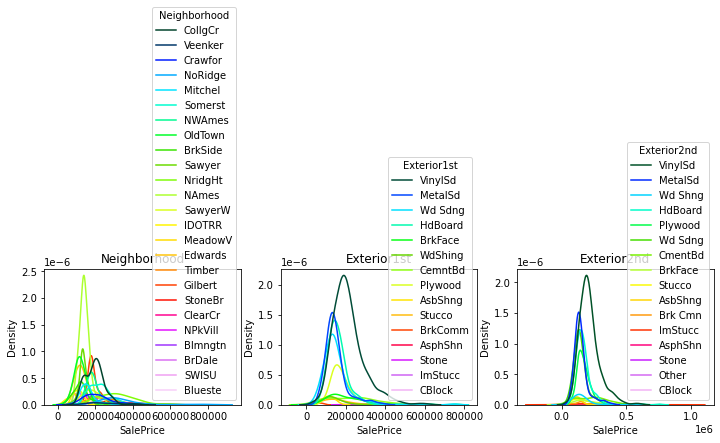

In [21]:
#10TH ROW ['Neighborhood', 'Exterior1st', 'Exterior2nd']
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,3,1)
sns.kdeplot(data=data1, x='SalePrice', hue='Neighborhood', palette='gist_ncar')
title = plt.title("Neighborhood")

plt.subplot(1,3,2)
sns.kdeplot(data=data1, x='SalePrice', hue='Exterior1st', palette='gist_ncar')
title = plt.title("Exterior1st")

plt.subplot(1,3,3)
sns.kdeplot(data=data1, x='SalePrice', hue='Exterior2nd', palette='gist_ncar')
title = plt.title("Exterior2nd")
fig.tight_layout()

In [21]:
print(data1['Street'].value_counts())
print(data_val['Street'].value_counts())
print(data1['Utilities'].value_counts())
print(data_val['Utilities'].value_counts())

Pave    1454
Grvl       6
Name: Street, dtype: int64
Pave    1453
Grvl       6
Name: Street, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
AllPub    1457
Name: Utilities, dtype: int64


From the graphs, we can see that ['Street', 'Utilities'] has a unique pattern, the value extremely distributed into one value, more than 99% of the values. We need to drop these variables since will not help our prediction

In [22]:
for dataset in data_cleaner:
    dataset.drop('Street', axis=1, inplace=True)
    dataset.drop('Utilities', axis=1, inplace=True)

In [ ]:
#1ST ROW ['MSZoning', 'LotShape', 'LandContour', 'LotConfig']
#2ND ROW ['LandSlope', 'Condition1', 'Condition2', 'BldgType']
#3RD ROW ['HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType']
#4TH ROW ['ExterQual', 'ExterCond', 'Foundation', 'BsmtQual']
#5TH ROW ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
#6TH ROW ['Heating', 'HeatingQC', 'Electrical', 'KitchenQual']
#7TH ROW ['Functional', 'GarageType', 'GarageFinish', 'GarageQual']
#8TH ROW ['GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
#9TH ROW ['Street', 'Utilities', 'CentralAir']

In [32]:
print(len(data1['MSZoning'].value_counts()))
print(len(dataset['MSZoning'].value_counts()))
print(len(data1['LotShape'].value_counts()))
print(len(dataset['LotShape'].value_counts()))
print(len(data1['LandContour'].value_counts()))
print(len(dataset['LandContour'].value_counts()))
print(len(data1['LotConfig'].value_counts()))
print(len(dataset['LotConfig'].value_counts()), "\n")

print(len(data1['LandSlope'].value_counts()))
print(len(dataset['LandSlope'].value_counts()))
print(len(data1['Condition1'].value_counts()))
print(len(dataset['Condition1'].value_counts()))
print(len(data1['Condition2'].value_counts()))
print(len(dataset['Condition2'].value_counts()))
print(len(data1['BldgType'].value_counts()))
print(len(dataset['BldgType'].value_counts()), "\n")

print(len(data1['HouseStyle'].value_counts()))
print(len(dataset['HouseStyle'].value_counts()))
print(len(data1['RoofStyle'].value_counts()))
print(len(dataset['RoofStyle'].value_counts()))
print(len(data1['RoofMatl'].value_counts()))
print(len(dataset['RoofMatl'].value_counts()))
print(len(data1['MasVnrType'].value_counts()))
print(len(dataset['MasVnrType'].value_counts()), "\n")

print(len(data1['ExterQual'].value_counts()))
print(len(dataset['ExterQual'].value_counts()))
print(len(data1['ExterCond'].value_counts()))
print(len(dataset['ExterCond'].value_counts()))
print(len(data1['Foundation'].value_counts()))
print(len(dataset['Foundation'].value_counts()))
print(len(data1['BsmtQual'].value_counts()))
print(len(dataset['BsmtQual'].value_counts()), "\n")

print(len(data1['BsmtCond'].value_counts()))
print(len(dataset['BsmtCond'].value_counts()))
print(len(data1['BsmtExposure'].value_counts()))
print(len(dataset['BsmtExposure'].value_counts()))
print(len(data1['BsmtFinType1'].value_counts()))
print(len(dataset['BsmtFinType1'].value_counts()))
print(len(data1['BsmtFinType2'].value_counts()))
print(len(dataset['BsmtFinType2'].value_counts()), "\n")

print(len(data1['Heating'].value_counts()))
print(len(dataset['Heating'].value_counts()))
print(len(data1['HeatingQC'].value_counts()))
print(len(dataset['HeatingQC'].value_counts()))
print(len(data1['Electrical'].value_counts()))
print(len(dataset['Electrical'].value_counts()))
print(len(data1['KitchenQual'].value_counts()))
print(len(dataset['KitchenQual'].value_counts()), "\n")

print(len(data1['Functional'].value_counts()))
print(len(dataset['Functional'].value_counts()))
print(len(data1['GarageType'].value_counts()))
print(len(dataset['GarageType'].value_counts()))
print(len(data1['GarageFinish'].value_counts()))
print(len(dataset['GarageFinish'].value_counts()))
print(len(data1['GarageQual'].value_counts()))
print(len(dataset['GarageQual'].value_counts()), "\n")

print(len(data1['GarageCond'].value_counts()))
print(len(dataset['GarageCond'].value_counts()))
print(len(data1['PavedDrive'].value_counts()))
print(len(dataset['PavedDrive'].value_counts()))
print(len(data1['SaleType'].value_counts()))
print(len(dataset['SaleType'].value_counts()))
print(len(data1['SaleCondition'].value_counts()))
print(len(dataset['SaleCondition'].value_counts()), "\n")

print(len(data1['CentralAir'].value_counts()))
print(len(dataset['CentralAir'].value_counts()), "\n")

print(len(data1['Neighborhood'].value_counts()))
print(len(dataset['Neighborhood'].value_counts()))
print(len(data1['Exterior1st'].value_counts()))
print(len(dataset['Exterior1st'].value_counts()))
print(len(data1['Exterior2nd'].value_counts()))
print(len(dataset['Exterior2nd'].value_counts()))

5
5
4
4
4
4
5
5 

3
3
9
9
8
5
5
5 

8
7
6
6
8
4
4
4 

4
4
5
5
6
6
4
4 

4
4
4
4
6
6
6
6 

6
4
5
5
5
4
4
4 

7
7
6
6
3
3
5
4 

5
5
3
3
9
9
6
6 

2
2 

25
25
15
13
16
15


Now we will convert these categorical variable into numerical variable. In variable who has unique values more than or equal to 10 (high cardinality) I will apply target encoding. In variable who has unique values less than 10 (low cardinality) I will apply one-hot encoding

But first we need to fill the missing values. Since the proportion of the variable missing values are around 2 and 6 percents (under 10 percents). I will replace the missing values with the mode.

In [24]:
missing_data_train_count = data1.isnull().sum()
missing_data_train_percent = data1.isnull().sum() / len(data1) * 100

missing_data_train = pd.DataFrame({
    'data1 Count': missing_data_train_count,
    'data1 Percent': missing_data_train_percent
})
missing_data_train = missing_data_train[missing_data_train['data1 Count'] > 0]
missing_data_train.sort_values(by='data1 Count', ascending=False, inplace=True)

print(f"There are {missing_data_train.shape[0]} features having missing data in training set.")

###
missing_data_val_count = data_val.isnull().sum()
missing_data_val_percent = data_val.isnull().sum() / len(data_val) * 100

missing_data_val = pd.DataFrame({
    'data_val Count': missing_data_val_count,
    'data_val Percent': missing_data_val_percent
})
missing_data_val = missing_data_val[missing_data_val['data_val Count'] > 0]
missing_data_val.sort_values(by='data_val Count', ascending=False, inplace=True)

print(f"There are {missing_data_val.shape[0]} features having missing data in test set.")

result = pd.concat([missing_data_train, missing_data_val], axis=1)
result

There are 12 features having missing data in training set.
There are 17 features having missing data in test set.


,data1 Count,data1 Percent,data_val Count,data_val Percent
GarageType,81.0,5.547945,76.0,5.209047
GarageYrBlt,81.0,5.547945,78.0,5.346127
GarageFinish,81.0,5.547945,78.0,5.346127
GarageQual,81.0,5.547945,78.0,5.346127
GarageCond,81.0,5.547945,78.0,5.346127
BsmtExposure,38.0,2.602740,44.0,3.015764
BsmtFinType2,38.0,2.602740,42.0,2.878684
BsmtQual,37.0,2.534247,44.0,3.015764
BsmtCond,37.0,2.534247,45.0,3.084304
BsmtFinType1,37.0,2.534247,42.0,2.878684


In [25]:
for dataset in data_cleaner:
    dataset['MSZoning'] = dataset['MSZoning'].fillna(dataset['MSZoning'].mode()[0])
    dataset['MasVnrType'] = dataset['MasVnrType'].fillna(dataset['MasVnrType'].mode()[0])
    dataset['BsmtQual'] = dataset['BsmtQual'].fillna(dataset['BsmtQual'].mode()[0])
    dataset['BsmtCond'] = dataset['BsmtCond'].fillna(dataset['BsmtCond'].mode()[0])
    dataset['BsmtExposure'] = dataset['BsmtExposure'].fillna(dataset['BsmtExposure'].mode()[0])
    dataset['BsmtFinType1'] = dataset['BsmtFinType1'].fillna(dataset['BsmtFinType1'].mode()[0])
    dataset['BsmtFinType2'] = dataset['BsmtFinType2'].fillna(dataset['BsmtFinType2'].mode()[0])
    dataset['KitchenQual'] = dataset['KitchenQual'].fillna(dataset['KitchenQual'].mode()[0])
    dataset['Functional'] = dataset['Functional'].fillna(dataset['Functional'].mode()[0])
    dataset['GarageType'] = dataset['GarageType'].fillna(dataset['GarageType'].mode()[0])
    dataset['GarageFinish'] = dataset['GarageFinish'].fillna(dataset['GarageFinish'].mode()[0])
    dataset['GarageQual'] = dataset['GarageQual'].fillna(dataset['GarageQual'].mode()[0])
    dataset['GarageCond'] = dataset['GarageCond'].fillna(dataset['GarageCond'].mode()[0])
    dataset['GarageFinish'] = dataset['GarageFinish'].fillna(dataset['GarageFinish'].mode()[0])
    dataset['SaleType'] = dataset['SaleType'].fillna(dataset['SaleType'].mode()[0])
    dataset['Exterior1st'] = dataset['Exterior1st'].fillna(dataset['Exterior1st'].mode()[0])
    dataset['Exterior2nd'] = dataset['Exterior2nd'].fillna(dataset['Exterior2nd'].mode()[0])
    dataset['Electrical'] = dataset['Electrical'].fillna(dataset['Electrical'].mode()[0])

In [26]:
missing_data_train_count = data1.isnull().sum()
missing_data_train_percent = data1.isnull().sum() / len(data1) * 100

missing_data_train = pd.DataFrame({
    'data1 Count': missing_data_train_count,
    'data1 Percent': missing_data_train_percent
})
missing_data_train = missing_data_train[missing_data_train['data1 Count'] > 0]
missing_data_train.sort_values(by='data1 Count', ascending=False, inplace=True)

print(f"There are {missing_data_train.shape[0]} features having missing data in training set.")

###
missing_data_val_count = data_val.isnull().sum()
missing_data_val_percent = data_val.isnull().sum() / len(data_val) * 100

missing_data_val = pd.DataFrame({
    'data_val Count': missing_data_val_count,
    'data_val Percent': missing_data_val_percent
})
missing_data_val = missing_data_val[missing_data_val['data_val Count'] > 0]
missing_data_val.sort_values(by='data_val Count', ascending=False, inplace=True)

print(f"There are {missing_data_val.shape[0]} features having missing data in test set.")

result = pd.concat([missing_data_train, missing_data_val], axis=1)
result

There are 1 features having missing data in training set.
There are 1 features having missing data in test set.


,data1 Count,data1 Percent,data_val Count,data_val Percent
GarageYrBlt,81,5.547945,78,5.346127


### Mass One-Hot Encoding

these variables have unique values differences between the training and test data set

    ['Condition2', 'HouseStyle', 'RoofMatl', 'Heating', 'Electrical', 'GarageQual'],

so we can't use one-hot encoding directly, because the columns generated would'nt be the same

In [35]:
data1test = pd.get_dummies(data1, columns = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig',
 'LandSlope', 'Condition1', 'BldgType',
 'RoofStyle', 'MasVnrType',
 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
 'HeatingQC', 'KitchenQual',
 'Functional', 'GarageType', 'GarageFinish', 
'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition',
 'CentralAir'])

In [36]:
data_valtest = pd.get_dummies(data_val, columns = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig',
 'LandSlope', 'Condition1', 'BldgType',
 'RoofStyle', 'MasVnrType',
 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
 'HeatingQC', 'KitchenQual',
 'Functional', 'GarageType', 'GarageFinish', 
'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition',
 'CentralAir'])

In [75]:
data1.shape

(1460, 85)

In [76]:
data1.shape

(1459, 84)

### Manual one-hot encoding

Manual one-hot encoding for these variables
    
    ['Condition2', 'HouseStyle', 'RoofMatl', 'Heating', 'Electrical', 'GarageQual']

In [77]:
for dataset in data_cleaner:
    # New features - training set
    dataset['Condition2_Norm']=(dataset['Condition2']=='Norm').astype(int)   # one-hot encoding
    dataset['Condition2_Feedr']=(dataset['Condition2']=='Feedr').astype(int)
    dataset['Condition2_Artery']=(dataset['Condition2']=='Artery').astype(int)
    dataset['Condition2_RRNn']=(dataset['Condition2']=='RRNn').astype(int)
    dataset['Condition2_PosN']=(dataset['Condition2']=='PosN').astype(int)
    dataset['Condition2_PosA']=(dataset['Condition2']=='PosA').astype(int)
    dataset['Condition2_RRAn']=(dataset['Condition2']=='RRAn').astype(int)
    dataset['Condition2_RRAe']=(dataset['Condition2']=='RRAe').astype(int)

In [78]:
for dataset in data_cleaner:
    # New features - training set
    dataset['HouseStyle_1Story']=(dataset['HouseStyle']=='1Story').astype(int)   # one-hot encoding
    dataset['HouseStyle_2Story']=(dataset['HouseStyle']=='2Story').astype(int)
    dataset['HouseStyle_1.5Fin']=(dataset['HouseStyle']=='1.5Fin').astype(int)
    dataset['HouseStyle_SLvl']=(dataset['HouseStyle']=='SLvl').astype(int)
    dataset['HouseStyle_SFoyer']=(dataset['HouseStyle']=='SFoyer').astype(int)
    dataset['HouseStyle_1.5Un']=(dataset['HouseStyle']=='1.5Un').astype(int)
    dataset['HouseStyle_2.5Unf']=(dataset['HouseStyle']=='2.5Unf').astype(int)
    dataset['HouseStyle_2.5Fin']=(dataset['HouseStyle']=='2.5Fin').astype(int)

In [79]:
for dataset in data_cleaner:
    # New features - training set
    dataset['RoofMatl_CompShg']=(dataset['RoofMatl']=='CompShg').astype(int)   # one-hot encoding
    dataset['RoofMatl_Tar&Grv']=(dataset['RoofMatl']=='Tar&Grv').astype(int)
    dataset['RoofMatl_WdShngl']=(dataset['RoofMatl']=='WdShngl').astype(int)
    dataset['RoofMatl_WdShake']=(dataset['RoofMatl']=='WdShake').astype(int)
    dataset['RoofMatl_Metal']=(dataset['RoofMatl']=='Metal').astype(int)
    dataset['RoofMatl_Membran']=(dataset['RoofMatl']=='Membran').astype(int)
    dataset['RoofMatl_Roll']=(dataset['RoofMatl']=='Roll').astype(int)
    dataset['RoofMatl_ClyTile']=(dataset['RoofMatl']=='ClyTile').astype(int)

In [80]:
for dataset in data_cleaner:
    # New features - training set
    dataset['Heating_GasA']=(dataset['Heating']=='GasA').astype(int)   # one-hot encoding
    dataset['Heating_GasW']=(dataset['Heating']=='GasW').astype(int)
    dataset['Heating_Grav']=(dataset['Heating']=='Grav').astype(int)
    dataset['Heating_Wall']=(dataset['Heating']=='Wall').astype(int)
    dataset['Heating_OthW']=(dataset['Heating']=='OthW').astype(int)
    dataset['Heating_Floor']=(dataset['Heating']=='Floor').astype(int)

In [81]:
for dataset in data_cleaner:
    # New features - training set
    dataset['Electrical_SBrkr']=(dataset['Electrical']=='SBrkr').astype(int)   # one-hot encoding
    dataset['Electrical_FuseA']=(dataset['Electrical']=='FuseA').astype(int)
    dataset['Electrical_FuseF']=(dataset['Electrical']=='FuseF').astype(int)
    dataset['Electrical_FuseP']=(dataset['Electrical']=='FuseP').astype(int)
    dataset['Electrical_Mix']=(dataset['Electrical']=='Mix').astype(int)

In [82]:
for dataset in data_cleaner:
    # New features - training set
    dataset['GarageQual_TA']=(dataset['GarageQual']=='TA').astype(int)   # one-hot encoding
    dataset['GarageQual_Fa']=(dataset['GarageQual']=='Fa').astype(int)
    dataset['GarageQual_Gd']=(dataset['GarageQual']=='Gd').astype(int)
    dataset['GarageQual_Ex']=(dataset['GarageQual']=='Ex').astype(int)
    dataset['GarageQual_Po']=(dataset['GarageQual']=='Po').astype(int)

In [83]:
data1.shape

(1460, 125)

In [84]:
data_val.shape

(1459, 124)

## Other Variables

In [ ]:
Other       ['Id', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

    YearBuilt:     Original construction date
    YearRemodAdd:  Remodel date
    GarageYrBlt:   Year garage was built
    MoSold:        Month Sold
    YrSold:        Year Sold

#### [MoSold]

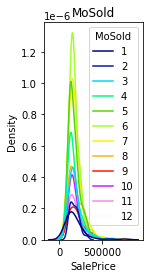

In [29]:
plt.subplot(1,3,3)
sns.kdeplot(data=data1, x='SalePrice', hue='MoSold', palette='gist_ncar')
title = plt.title("MoSold")
fig.tight_layout()

As we can see, the graph has a unique patterns. The months around summer has way higher 'SalesPrice' density than the months around winter. In my notebook, this situation is called 'unique pattern in some certain values'. I will generate new feature that separate the months around summer and winter equally.

In [30]:
#CONVERT THIS NOMINAL VARIABLE TO BINARY VARIABLE THEN CONVERT TO NUMERICAL VALUE WITH ONE-HOT ENCODER
for dataset in data_cleaner:
    # New features - training set
    dataset['MoSold_winter']=((dataset['MoSold']<4) | (dataset['MoSold']>9)).astype(int)
    dataset['MoSold_summer']=((dataset['MoSold']>=4) & (dataset['MoSold']<=9)).astype(int)

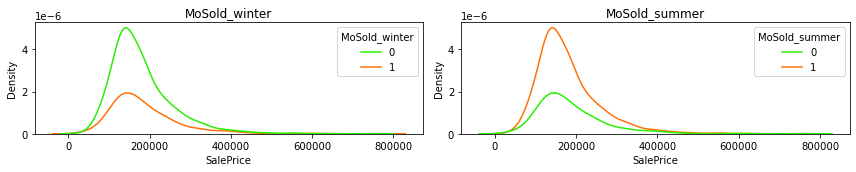

In [31]:
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,2,1)
sns.kdeplot(data=data1, x='SalePrice', hue='MoSold_winter', palette='gist_ncar') #to Binary to one-hot encoding
title = plt.title("MoSold_winter")

plt.subplot(1,2,2)
sns.kdeplot(data=data1, x='SalePrice', hue='MoSold_summer', palette='gist_ncar')
title = plt.title("MoSold_summer")
fig.tight_layout()

It seems like the average and deviation of 'SalePrice' for winter and summer relatively the same. The big difference between this two binary value is the number of house sales.

#### ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

YearBuilt    YearRemodAdd:  Remodel date
    GarageYrBlt:   Year garage was built
    MoSold:        Month Sold
    YrSold:        Year Sold

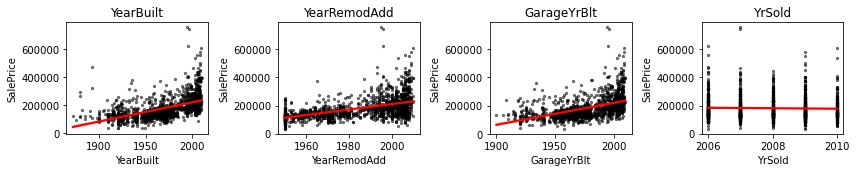

In [32]:
#10TH ROW ['Neighborhood', 'Exterior1st', 'Exterior2nd']
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,4,1)
sns.regplot(data=data1, x='YearBuilt', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("YearBuilt")

plt.subplot(1,4,2)
sns.regplot(data=data1, x='YearRemodAdd', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("YearRemodAdd")

plt.subplot(1,4,3)
sns.regplot(data=data1, x='GarageYrBlt', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("GarageYrBlt")

plt.subplot(1,4,4)
sns.regplot(data=data1, x='YrSold', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("YrSold")
fig.tight_layout()

In [33]:
print(dataset['YearBuilt'].isna().sum())
print(dataset['YearRemodAdd'].isna().sum())
print(dataset['GarageYrBlt'].isna().sum())
print(dataset['YrSold'].isna().sum())

0
0
78
0


Between these 4 variables, only 'GarageYrBlt' who has null value. We need to check if 'GarageYrBlt' is null because some houses do not have a garage or simply just because the data is missing

Check other variables who related to garage:

    GarageType:    Garage location
    GarageYrBlt:   Year garage was built
    GarageFinish:  Interior finish of the garage
    GarageCars:    Size of garage in car capacity
    GarageArea:    Size of garage in square feet
    GarageQual:    Garage quality
    GarageCond:    Garage condition

In [34]:
print(dataset['GarageType'].isna().sum())
print(dataset['GarageFinish'].isna().sum())
print(dataset['GarageCars'].isna().sum())
print(dataset['GarageArea'].isna().sum())
print(dataset['GarageQual'].isna().sum())
print(dataset['GarageCond'].isna().sum())

0
0
0
0
0
0


In ['GarageCars'] and ['GarageArea'] variables there is only one missing data. So we could conclude that the null value in the ['GarageYrBlt'] variable is just because a missing data. Before deciding to fill the null with traditional ways like median and mean. We need to see the relationship with other variable.

I want to check the relationship between ['GarageYrBlt'] and ['YearBuilt']

In [35]:
print('The number of Garage that was built in the same year the house was built:', ((data1['YearBuilt']-data1['GarageYrBlt'])==0).sum())
print('The number of Garage that was built after the house was built:', ((data1['YearBuilt']-data1['GarageYrBlt'])<0).sum())
print('The number of Garage that was built before the house was built:', ((data1['YearBuilt']-data1['GarageYrBlt'])>0).sum())

The number of Garage that was built in the same year the house was built: 1089
The number of Garage that was built after the house was built: 281
The number of Garage that was built before the house was built: 9


So, most of the garage was build in the same year the house was built. So, in this variable I will fill the missing value with the 'YearBuilt' values.

In [36]:
for dataset in data_cleaner:
    # Fill ['GarageYrBlt'] missing data with ['YearBuilt'] value
    dataset['GarageYrBlt'] = dataset.apply(lambda row: row['YearBuilt']
                           if np.isnan(row['GarageYrBlt'])
                           else row['GarageYrBlt'], axis=1)

In [37]:
print(dataset['YearBuilt'].isna().sum())
print(dataset['YearRemodAdd'].isna().sum())
print(dataset['GarageYrBlt'].isna().sum())
print(dataset['YrSold'].isna().sum())

0
0
0
0


## NEW VARIABLE

In [38]:
for dataset in data_cleaner:
    # Add 3 new features
    dataset['Age_house']=(dataset['YrSold']-dataset['YearBuilt'])
    dataset['Age_remod']=(dataset['YearRemodAdd']-dataset['YearBuilt'])
    dataset['Age_garage']=(dataset['GarageYrBlt']-dataset['YearBuilt'])

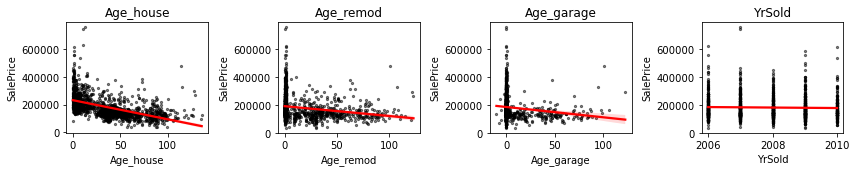

In [39]:
#10TH ROW ['Neighborhood', 'Exterior1st', 'Exterior2nd']
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,4,1)
sns.regplot(data=data1, x='Age_house', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("Age_house")

plt.subplot(1,4,2)
sns.regplot(data=data1, x='Age_remod', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("Age_remod")

plt.subplot(1,4,3)
sns.regplot(data=data1, x='Age_garage', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("Age_garage")

plt.subplot(1,4,4)
sns.regplot(data=data1, x='YrSold', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("YrSold")
fig.tight_layout()

We find a new pattern here that some property's age, remod age and garage age are 0 and 1. It is probably a new feature. We could generate new variables that explain that the feature is new

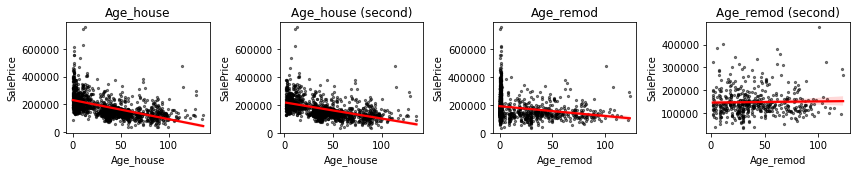

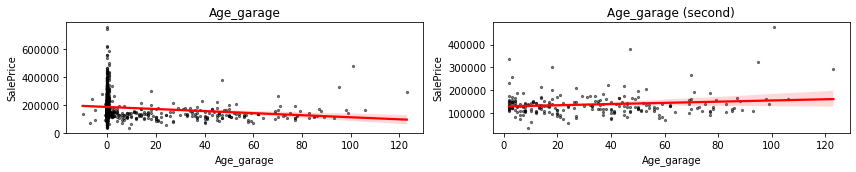

In [40]:
#1ST ROW
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,4,1)
sns.regplot(data=data1, x='Age_house', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("Age_house")

plt.subplot(1,4,2)
sns.regplot(data=data1.loc[data1['Age_house']>1], x='Age_house', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("Age_house (second)")

plt.subplot(1,4,3)
sns.regplot(data=data1, x='Age_remod', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("Age_remod")

plt.subplot(1,4,4)
sns.regplot(data=data1.loc[data1['Age_remod']>1], x='Age_remod', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("Age_remod (second)")
fig.tight_layout()

#2ND ROW
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,2,1)
sns.regplot(data=data1, x='Age_garage', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("Age_garage")

plt.subplot(1,2,2)
sns.regplot(data=data1.loc[data1['Age_garage']>1], x='Age_garage', y='SalePrice', scatter_kws = {"color": "black", "alpha": 0.5, "s": 5},line_kws = {"color": "red"}, ci = 95)
title = plt.title("Age_garage (second)")
fig.tight_layout()

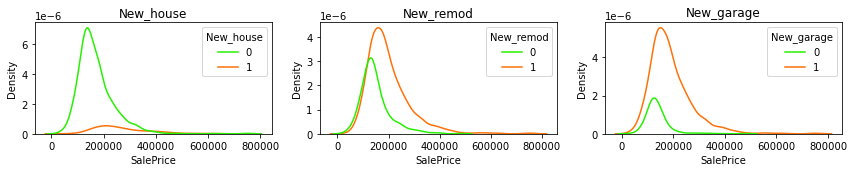

In [41]:
for dataset in data_cleaner: 
    dataset['New_house']=(dataset['Age_house']<2).astype(int)
    dataset['New_remod']=(dataset['Age_remod']<2).astype(int)
    dataset['New_garage']=(dataset['Age_garage']<2).astype(int)

#2ND ROW
fig=plt.figure(figsize=(12,2.5))
plt.subplot(1,3,1)
sns.kdeplot(data=data1, x='SalePrice', hue='New_house', palette='gist_ncar')
title = plt.title("New_house")

plt.subplot(1,3,2)
sns.kdeplot(data=data1, x='SalePrice', hue='New_remod', palette='gist_ncar')
title = plt.title("New_remod")

plt.subplot(1,3,3)
sns.kdeplot(data=data1, x='SalePrice', hue='New_garage', palette='gist_ncar')
title = plt.title("New_garage")
fig.tight_layout()

Every new features has a higher average ['SalePrice'] value.

Delete:
    
    ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'] From 3 Date variables to 3 Discrete Variables

Add:

    ['Age_house', 'Age_remod', 'Age_garage']

It seems like in ['YrSold'] variable there is no inflation in house price. The house price relatively stable through time. So from this 4 original variable, I will delete all the origin variable and use new 3 variables that come from the origin

## FINAL CHECKING null

In [42]:
missing_data_train_count = data1.isnull().sum()
missing_data_train_percent = data1.isnull().sum() / len(data1) * 100

missing_data_train = pd.DataFrame({
    'data1 Count': missing_data_train_count,
    'data1 Percent': missing_data_train_percent
})
missing_data_train = missing_data_train[missing_data_train['data1 Count'] > 0]
missing_data_train.sort_values(by='data1 Count', ascending=False, inplace=True)

print(f"There are {missing_data_train.shape[0]} features having missing data in training set.")

###
missing_data_val_count = data_val.isnull().sum()
missing_data_val_percent = data_val.isnull().sum() / len(data_val) * 100

missing_data_val = pd.DataFrame({
    'data_val Count': missing_data_val_count,
    'data_val Percent': missing_data_val_percent
})
missing_data_val = missing_data_val[missing_data_val['data_val Count'] > 0]
missing_data_val.sort_values(by='data_val Count', ascending=False, inplace=True)

print(f"There are {missing_data_val.shape[0]} features having missing data in test set.")

result = pd.concat([missing_data_train, missing_data_val], axis=1)
result

There are 0 features having missing data in training set.
There are 0 features having missing data in test set.


,data1 Count,data1 Percent,data_val Count,data_val Percent


## CONVERT CATEGORICAL TO NUMERICAL

In [159]:
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 92 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1459 non-null   int64  
 1   MSSubClass         1459 non-null   int64  
 2   MSZoning           1459 non-null   object 
 3   LotArea            1459 non-null   int64  
 4   LotShape           1459 non-null   object 
 5   LandContour        1459 non-null   object 
 6   LotConfig          1459 non-null   object 
 7   LandSlope          1459 non-null   object 
 8   Neighborhood       1459 non-null   object 
 9   Condition1         1459 non-null   object 
 10  Condition2         1459 non-null   object 
 11  BldgType           1459 non-null   object 
 12  HouseStyle         1459 non-null   object 
 13  OverallQual        1459 non-null   int64  
 14  OverallCond        1459 non-null   int64  
 15  YearBuilt          1459 non-null   int64  
 16  YearRemodAdd       1459 

In [47]:
dataset['MSZoning'].value_counts()

RL         1118
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

# 4. Model